<a href="https://colab.research.google.com/github/apoorv2512/INBT/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [144]:
#Reading csv file using pandas

df= pd.read_csv('/content/drive/MyDrive/iNeuBytes/Mall_Customers.csv')

In [145]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [146]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [147]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Data Preprocessing

In [148]:
df.shape

(200, 5)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [150]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [151]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [152]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [153]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

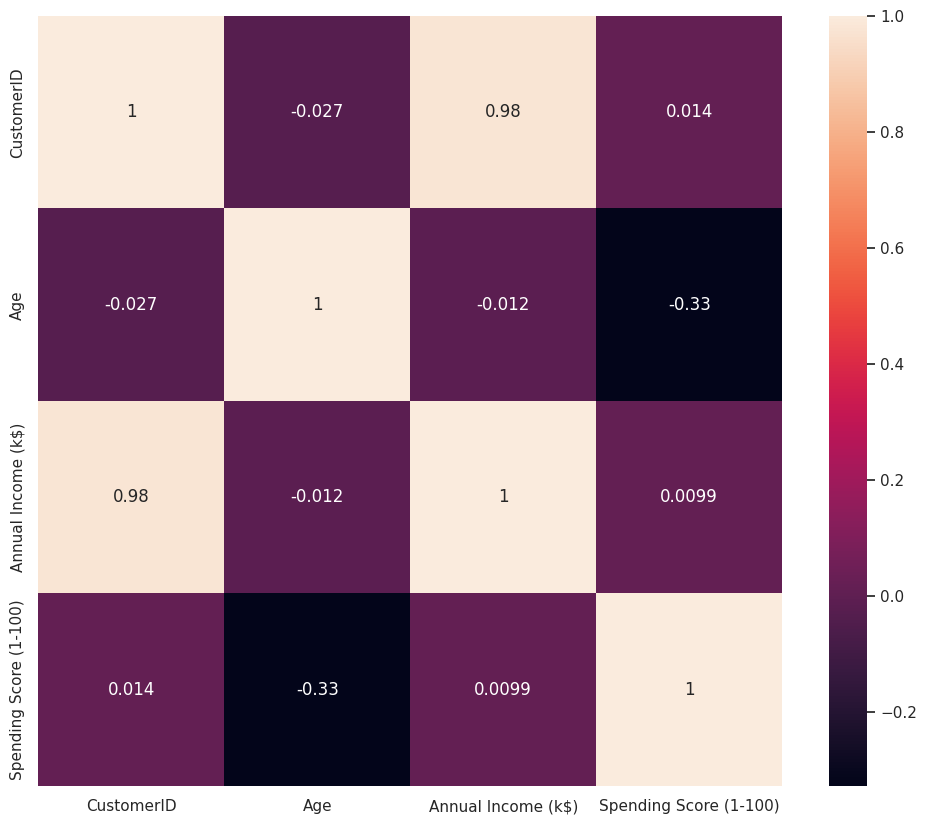

In [154]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

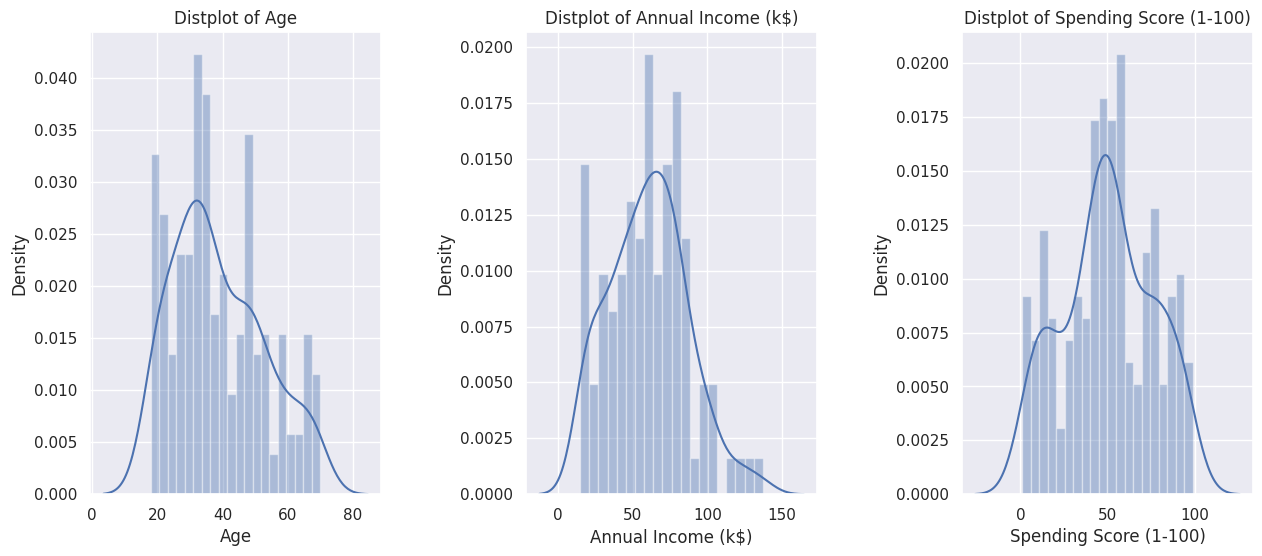

In [155]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [156]:
df['Gender'].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

**Data Visualisation**

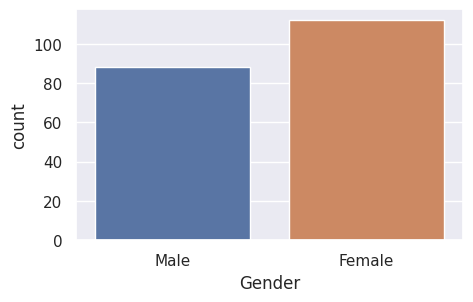

In [157]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="Gender")
plt.xlabel("Gender", fontsize=12)
plt.show()

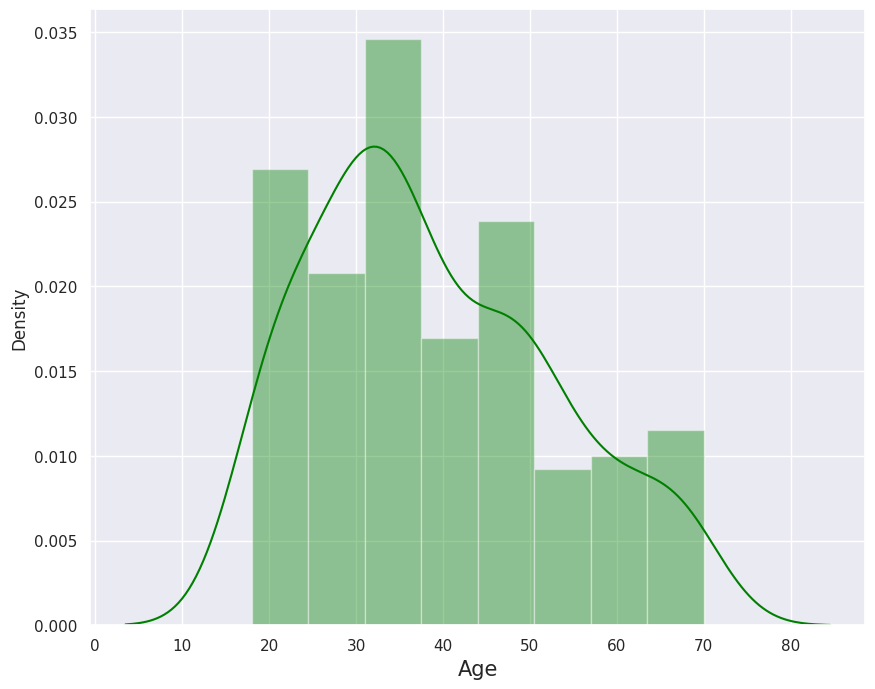

In [158]:
plt.figure(figsize=(10,8))
sns.distplot(df["Age"],color = "Green")
plt.xlabel("Age",fontsize = 15)
plt.show()

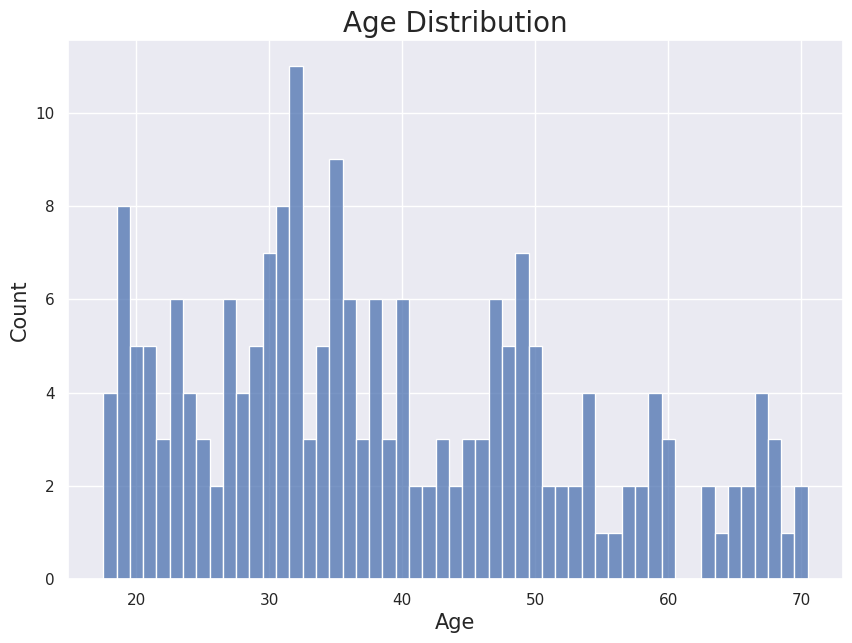

In [159]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x="Age", discrete=True, bins=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Age Distribution", fontsize=20)
plt.show()

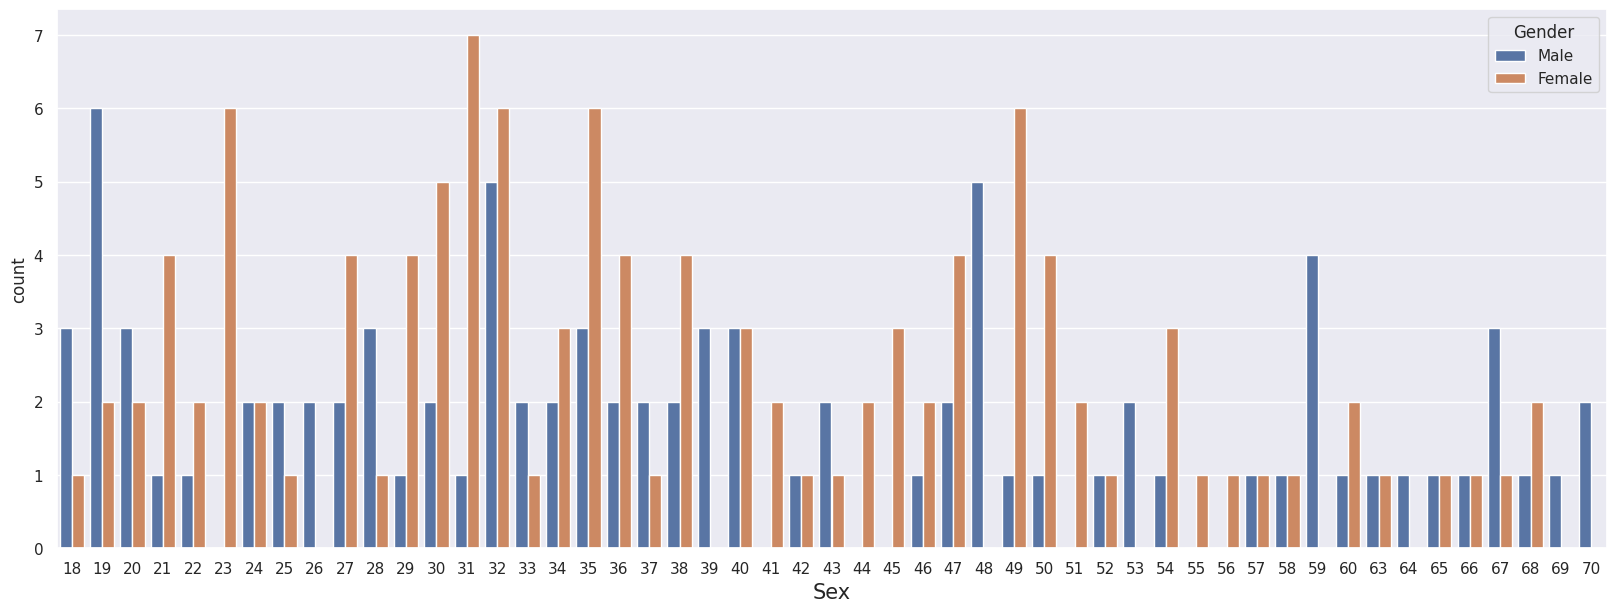

In [160]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,
              x = "Age",
              hue = "Gender")
plt.xlabel("Sex",fontsize = 15)
plt.show()

In [161]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [162]:
# Dropping the CustomerID Column as it is not required
df.drop(columns = ["CustomerID"],axis=1,inplace = True)

In [163]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [164]:
df['Annual Income (k$)'].loc[df['Gender']=='Female'].mean()

59.25

In [165]:
df['Annual Income (k$)'].loc[df['Gender']=='Male'].mean()

62.22727272727273

In [166]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [167]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [168]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [169]:
df.iloc[:,[2,3]].columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [170]:
df.iloc[:,[2,3]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [171]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [172]:
x = df[[ 'Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [174]:
x_train,y_train


(     Age  Annual Income (k$)
 86    55                  57
 182   46                  98
 69    32                  48
 125   31                  70
 42    48                  39
 ..   ...                 ...
 50    49                  42
 184   41                  99
 165   36                  85
 7     23                  18
 70    70                  49
 
 [160 rows x 2 columns],
 86     58
 182    15
 69     47
 125    77
 42     36
        ..
 50     52
 184    39
 165    75
 7      94
 70     55
 Name: Spending Score (1-100), Length: 160, dtype: int64)

Linear Regressor

In [175]:
linear_R=LinearRegression()
linear_R.fit(x_train,y_train)
y_predicted_train_linear_R=linear_R.predict(x_train)
y_predicted_test_linear_R=linear_R.predict(x_test)

Decision Tree Regressor

In [176]:
decision_tree=DecisionTreeRegressor(random_state=40)
decision_tree.fit(x_train,y_train)
y_predicted_train_decision_tree=decision_tree.predict(x_train)
y_predicted_test_decision_tree=decision_tree.predict(x_test)

Random Forest Regressor

In [177]:
RFR=RandomForestRegressor(random_state=40)
RFR.fit(x_train,y_train)

y_predicted_train_RFR=RFR.predict(x_train)
y_predicted_test_RFR=RFR.predict(x_test)

**Model Evaluation and Customer Segmentation**

Linear Regression

In [178]:
 from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print("              Training Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_train,y_predicted_train_linear_R))
print("Mean squared  error:     ",mean_squared_error(y_train,y_predicted_train_linear_R))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_train,y_predicted_train_linear_R)))
print("R2 score:               ",r2_score(y_train,y_predicted_train_linear_R))


              Training Dataset           
Mean absolute error:      20.847108634007988
Mean squared  error:      617.2836139438753
Root Mean squared error:  24.845192974575088
R2 score:                0.09936531572571039


In [179]:
print("              Testing Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_test,y_predicted_test_linear_R))
print("Mean squared  error:     ",mean_squared_error(y_test,y_predicted_test_linear_R))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predicted_test_linear_R)))
print("R2 score:               ",r2_score(y_test,y_predicted_test_linear_R))


              Testing Dataset           
Mean absolute error:      18.409867961000145
Mean squared  error:      499.0644921138943
Root Mean squared error:  22.33975138881125
R2 score:                0.13228434077537632


Decision Tree regression

In [180]:
print("              Training Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_train,y_predicted_train_decision_tree))
print("Mean squared  error:     ",mean_squared_error(y_train,y_predicted_train_decision_tree))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_train,y_predicted_train_decision_tree)))
print("R2 score:               ",r2_score(y_train,y_predicted_train_decision_tree))


              Training Dataset           
Mean absolute error:      1.3041666666666667
Mean squared  error:      48.510416666666664
Root Mean squared error:  6.964941971521849
R2 score:                0.929221896043121


In [181]:
print("              Testing Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_test,y_predicted_test_decision_tree))
print("Mean squared  error:     ",mean_squared_error(y_test,y_predicted_test_decision_tree))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predicted_test_decision_tree)))
print("R2 score:               ",r2_score(y_test,y_predicted_test_decision_tree))


              Testing Dataset           
Mean absolute error:      16.633333333333333
Mean squared  error:      594.9944444444444
Root Mean squared error:  24.392507957248768
R2 score:                -0.03450757317808795


Random Forest Regression

In [182]:
print("              Training Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_train,y_predicted_train_RFR))
print("Mean squared  error:     ",mean_squared_error(y_train,y_predicted_train_RFR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_train,y_predicted_train_RFR)))
print("R2 score:               ",r2_score(y_train,y_predicted_train_RFR))


              Training Dataset           
Mean absolute error:      6.532739285714285
Mean squared  error:      110.24431758863557
Root Mean squared error:  10.499729405495913
R2 score:                0.8391503452843915


In [183]:
print("              Testing Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_test,y_predicted_test_RFR))
print("Mean squared  error:     ",mean_squared_error(y_test,y_predicted_test_RFR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predicted_test_RFR)))
print("R2 score:               ",r2_score(y_test,y_predicted_test_RFR))


              Testing Dataset           
Mean absolute error:      13.499703571428572
Mean squared  error:      380.67420287616216
Root Mean squared error:  19.51087396494996
R2 score:                0.338127692676814


**Accuracy check for training and testing data**

In [184]:
#for training data
print(" Accuracy on training data set")
acc_linear_R_train=print(" Accuracy on linear Regression training data set            :  ",linear_R.score(x_train,y_train))
acc_decision_tree_train=print(" Accuracy on decision tree Regressor training data set      :  ",decision_tree.score(x_train,y_train))
acc_RFR_train=print(" Accuracy on Random forest Regressor training data set      :  ",RFR.score(x_train,y_train))


 Accuracy on training data set
 Accuracy on linear Regression training data set            :   0.09936531572571039
 Accuracy on decision tree Regressor training data set      :   0.929221896043121
 Accuracy on Random forest Regressor training data set      :   0.8391503452843915


In [185]:
# for testing data
print(" Accuracy on testing data set")
acc_linear_R_test=print(" Accuracy on linear Regression test data set            :  ",linear_R.score(x_test,y_test))
acc_decision_tree_test=print(" Accuracy on decision tree Regressor test data set      :  ",decision_tree.score(x_test,y_test))
acc_RFR_test=print(" Accuracy on Random forest Regressor test data set      :  ",RFR.score(x_test,y_test))


 Accuracy on testing data set
 Accuracy on linear Regression test data set            :   0.13228434077537632
 Accuracy on decision tree Regressor test data set      :   -0.03450757317808795
 Accuracy on Random forest Regressor test data set      :   0.338127692676814


**Customer segmentation using Clustering**

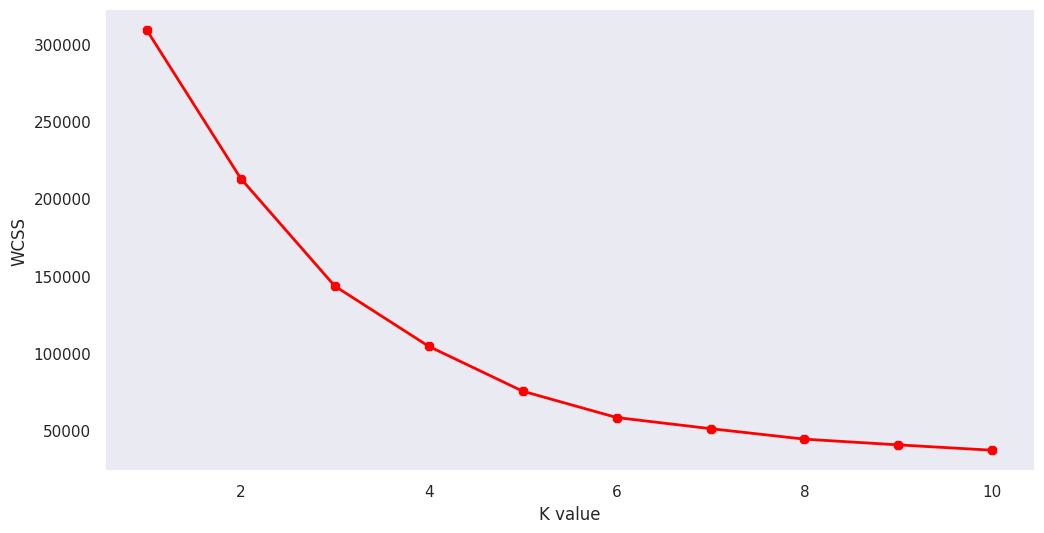

In [186]:
X3 = df.iloc[:,1:]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red",marker = "8")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [187]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X3)
label

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [188]:
kmeans.cluster_centers_

array([[43.08860759, 55.29113924, 49.56962025],
       [45.2173913 , 26.30434783, 20.91304348],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739],
       [32.69230769, 86.53846154, 82.12820513]])

Mapping clusters to data

In [189]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,5
2,Female,20,16,6,4
3,Female,23,16,77,5
4,Female,31,17,40,4


In [190]:
#For KNN
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1, 31))
parameters = dict(n_neighbors=k_range)
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid= parameters, scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [191]:
#For Decision Tree
from sklearn.tree import DecisionTreeClassifier

parameters1 = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['sqrt','sqrt','log2']
}
tree_classifier = DecisionTreeClassifier()
decision_cv = GridSearchCV(tree_classifier,param_grid=parameters1,scoring='accuracy')
decision_cv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')